In [12]:
## https://amunategui.github.io/reinforcement-learning/index.html
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]


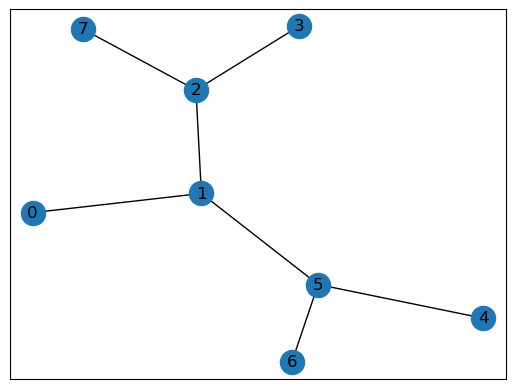

In [13]:
## We create a points-list map that represents each direction our bot can take. Using this format allows us to easily create complex graphs but also easily visualize everything with networkx graphs.

##Our starting point is 0, our goal point is 7.

goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [14]:
## The map shows that point 0 is where our bot will start its journey and point 7 is it’s final goal. The extra added points and false paths are the obstacles the bot will have to contend with. If you look at the top image, we can weave a story into this search - our bot is looking for honey, it is trying to find the hive and avoid the factory (the story-line will make sense in the second half of the article).
## We then create the rewards graph - this is the matrix version of our list of points map. We initialize the matrix to be the height and width of our points list (8 in this example) and initialize all values to -1:

In [15]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1


In [16]:
##assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [17]:
## To read the above matrix, the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions. We then build our Q-learning matrix which will hold all the lessons learned from our bot. The Q-learning model uses a transitional rule formula and gamma is the learning parameter

In [18]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 215.2
Score: 250.55762081784388
max_value 144.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 144.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_value 0.0
Score: 317.47211895910783
max_

Score: 976.5331922003819
max_value 494.86949930449964
Score: 974.261353787157
max_value 252.7164795548798
Score: 974.261353787157
max_value 394.86949930449964
Score: 974.261353787157
max_value 315.89559944359974
Score: 974.261353787157
max_value 315.89559944359974
Score: 974.261353787157
max_value 495.89559944359974
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 252.7164795548798
Score: 972.4523445970426
max_value 252.7164795548798
Score: 972.4523445970426
max_value 252.7164795548798
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 252.7164795548798
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 394.86949930449964
Score: 972.4523445970426
max_value 496.7164795548798
Score: 971.0105185107385
max_value 252.7164795548798
Score: 971.0105185107385
max_value 394.8

Score: 982.5855436281953
max_value 319.8844713948977
Score: 982.5855436281953
max_value 255.90757711591814
Score: 982.5855436281953
max_value 319.8844713948977
Score: 982.5855436281953
max_value 399.8555892436221
Score: 982.5855436281953
max_value 319.8844713948977
Score: 982.5855436281953
max_value 499.8194865545276
Score: 982.5945725601562
max_value 319.8844713948977
Score: 982.5945725601562
max_value 255.90757711591814
Score: 982.5945725601562
max_value 499.8555892436221
Score: 982.5308260739002
max_value 399.8555892436221
Score: 982.5308260739002
max_value 399.8555892436221
Score: 982.5308260739002
max_value 255.90757711591814
Score: 982.5308260739002
max_value 319.8844713948977
Score: 982.5308260739002
max_value 204.72606169273453
Score: 982.5865675764298
max_value 399.8555892436221
Score: 982.5865675764298
max_value 399.8555892436221
Score: 982.5865675764298
max_value 319.8844713948977
Score: 982.5865675764298
max_value 399.8555892436221
Score: 982.5865675764298
max_value 255.907

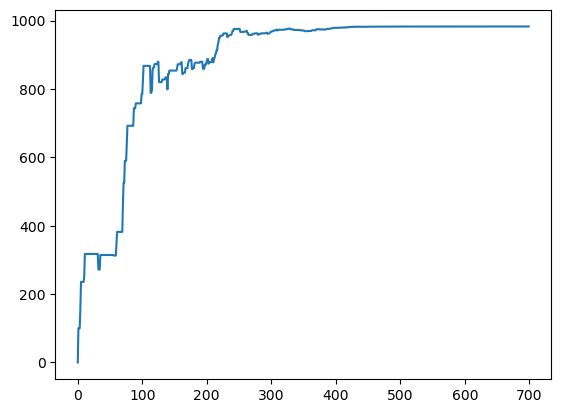

In [19]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [ ]:
## Note: The above graph may look a bit different from the previous graph but they, in fact, are the same graphs. This is due to the random placement of nodes by the networkx library.